## D208 - Predictive Modeling

### Import Libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error

### Load Data From medical_clean.csv

In [202]:
# load data file
train = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
train.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


#### Exploratory Data Analysis

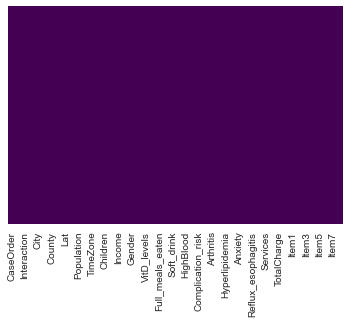

In [203]:
# Mapping Vis to view missing data...none present.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [204]:
sns.set_style('whitegrid')

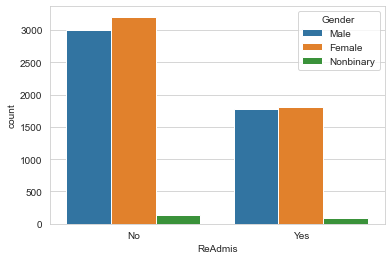

In [205]:
sns.countplot(x='ReAdmis', hue='Gender', data=train);

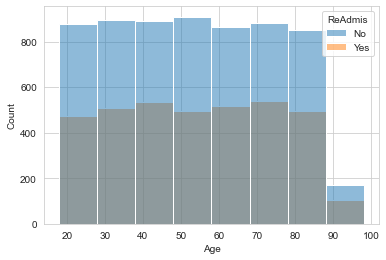

In [206]:
sns.histplot(hue="ReAdmis", x="Age", binwidth=10, data=train);
plt.show()

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

<AxesSubplot:xlabel='Initial_admin', ylabel='count'>

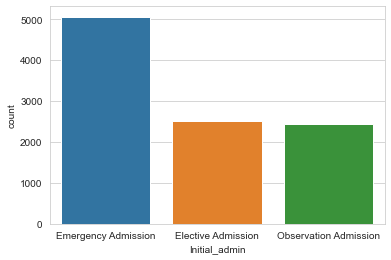

In [208]:
sns.countplot(x='Initial_admin', data=train)

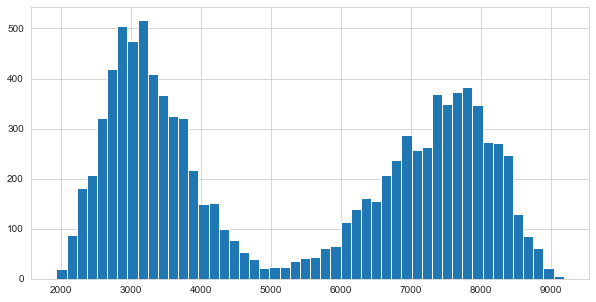

In [209]:
train['TotalCharge'].hist(bins=50, figsize=(10,5));

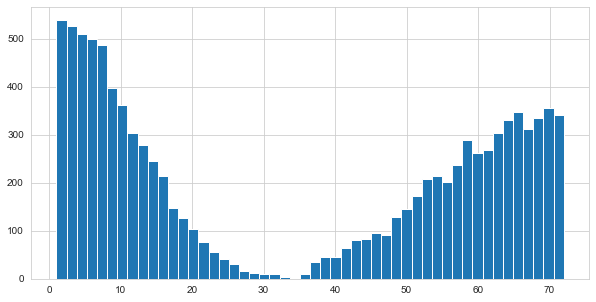

In [210]:
train['Initial_days'].hist(bins=50, figsize=(10,5));

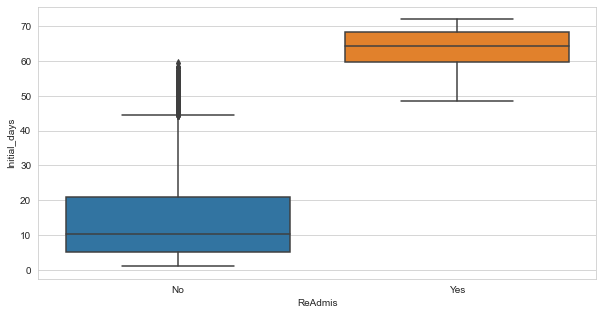

In [211]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ReAdmis', y='Initial_days', data=train);

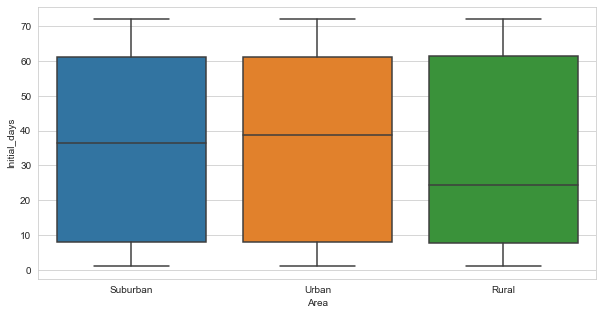

In [212]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Area', y='Initial_days', data=train);

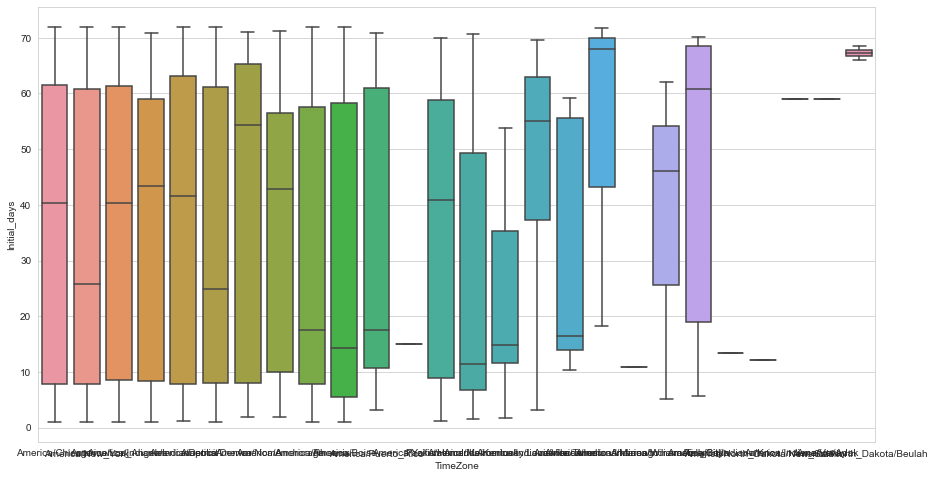

In [213]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='TimeZone', y='Initial_days', data=train);

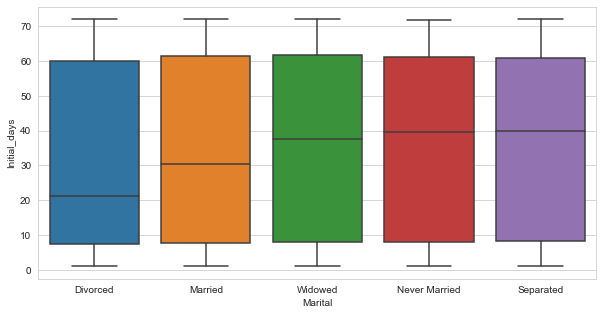

In [214]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Marital', y='Initial_days', data=train);

### Convert Categorical Features

In [215]:
train_cat = train.select_dtypes(exclude='number')
train_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


In [216]:
train_cat.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'],
      dtype='object')

In [217]:
pd.get_dummies(train['ReAdmis'])

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,0,1
9997,0,1
9998,0,1


In [218]:
# Drop First Column (Female) due to Multicolliniarity ... Since there is a nonbinary column, do I need to do this?
# gender = pd.get_dummies(train['Gender'], drop_first=True)
readmis = pd.get_dummies(train['ReAdmis'], drop_first=True)

In [220]:
# Why is the readmis column labeled 'Yes'? ... How do I rename to ReAdmis?
train = pd.concat([train,readmis],axis=1)
train.head(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Yes,Yes
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3,3,2,2,4,3,3,4,0,0
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,3,4,3,4,4,4,3,3,0,0


In [197]:
# pruned_df_num = df_num.drop(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
train = train.drop(['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children','Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
train.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Age', 'Income',
       'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Yes'],
      dtype='object')

---
###  **Part 1: Research Question:**
[A1] **Question:** "Do the following three predictiors (Initial Days, Overweight, and Diabetes) explain the variation in total total charges?"

---
### **Part III: Data Preparation**
---

In [132]:
#https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
# Describe Numeric Fields
df.describe(include = [np.number])

NameError: name 'df' is not defined

In [ ]:
# Describe Categorical Fields
df.describe(include = ['O'])

#### [B cont.] Create Subset Data Group to Focus On and Describe

In [ ]:
focus_df = df[['TotalCharge', 'Overweight', 'Diabetes', 'Initial_days']]
focus_df.info()

#### [B cont.] Describe the data analysis by doing the following:
 _Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set: **ANOVA**_

In [ ]:
# Change Data for Predictors
focus_df2 = focus_df.copy()
focus_df2['Overweight_Num'] = focus_df['Overweight'].eq('Yes').astype(int)
focus_df2['Diabetes_Num'] = focus_df['Diabetes'].eq('Yes').astype(int)
focus_df2

#### [D] Compare an initial and reduced multiple regression model

####   [D1] Construct an initial multiple regression model from _all_ predictors that were identified in [C2]

####   [D2] Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

####   [D3] Provide a reduced multiple regression model that includes both categorical and continuous variables.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# 90% Train, 10% Test
focus_df2_train, focus_df2_test = train_test_split(focus_df2, test_size=0.10, random_state=123)

In [ ]:
focus_df2_train

In [ ]:
focus_df2_test

In [ ]:
X = focus_df2_train[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]
y = focus_df2_train[['TotalCharge']]
# Add Constant
X = sm.add_constant(X)

In [ ]:
model01 = sm.OLS(y, X).fit()
model01.summary()

In [ ]:
# Verify Regression Model Results on Test Data:
X_test = pd.DataFrame(focus_df2_test[['Initial_days', 'Overweight_Num', 'Diabetes_Num']])
y_test = pd.DataFrame(focus_df2_test[['TotalCharge']])
X_test = sm.add_constant(X_test)
model01_test = sm.OLS(y_test, X_test).fit()
model01_test.summary()

#### **Stepwise Regression** in Python?

#### Estimation Model Evaluation

In [ ]:
# X = focus_df2_train[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]
# y = focus_df2_train[['TotalCharge']]
# # Add Constant
# X = sm.add_constant(X)
focus_df2.head(1)

In [ ]:
pat01 = np.column_stack((1, 10.58577, 0, 1))
model01.predict(pat01)

In [ ]:
ypred = model01.predict(X_test)
ypred
# The result is a column of predictions, one for each record in the test data set. 
# These values will allow us to calculate the MAE later in this section.

In [ ]:
# Calculate Standard Error of the Estimate
np.sqrt(model01.scale)

In [ ]:
# 90% Train, 10% Test
focus_df2_train, focus_df2_test = train_test_split(focus_df2, test_size=0.10, random_state=123)

In [ ]:
# Target variable values
ytrue = focus_df2_test[['TotalCharge']]
# MAE
mean_absolute_error(y_true = ytrue, y_pred = ypred)

#### Identify Multicollinearity 

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

In [ ]:
X = pd.DataFrame(focus_df2[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]);
pd.plotting.scatter_matrix(X);

In [ ]:
X = X.dropna()
X = sm.add_constant(X)
[inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# The output will include a VIF value for the constant term we added; ignore it. 
# The VIF values of interest are for the three predictor variables, which are 
# the second, third, and fourth numbers output by the variance_inflation_factor() command.

---
### **Part IV: Model Comparison and Analysis**
---

<ol> [D] Compare an Initial and a reduced multiple regression model by doing the following:
    <li>Construct an initial multiple regression model from all predictors that were identified in Part C2.</li>
    <li>Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.</li>
    <li>Provide a reduced multiple regression model that includes both categorical and continuous variables.
        </br>
        __Note: The output should include a screenshot of each model.__
</li>
</ol>
<ol> [E] Analyze the data set using your reduced multiple regression model by doing the following:
<li>Explain your data analysis process by comparing the initial and reduced multiple regression models,
    including the following elements:</li>
    <ul>
        <li>the logic of the variable selection technique</li>
        <li>the model evaluation metric</li>
        <li>a residual plot</li>
    </ul>
<li>Provide the output and any calculations of the analysis you performed, including the model’s residual error. 
</br>
__Note: The output should include the predictions from the refined model you used to perform the analysis.__</li>
<li>Provide the code used to support the implementation of the multiple regression models.</li>

    
    